# **Introduction**
Diabetes is a very common chronic disease that is currently affecting lives of 37.3 millions Americans. For reference, that is about 1 in 10 people are currently diagnosed with a form of diabetes. This analyis will use Naive Bayes classification model to predict the chances of a female patient having diabetes. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Variables and Bias-Variance Tradeoff**
Our data consists of 8 explanatory variables and 1 response variable, which is noted by the authors of the dataset that the data is a subset of a much larger dataset. Due to bias-variance tradeoff phenomena, we can say that this model is simple and will underfit the data.

Our variables are as follows:
1.   Pregnancies - Number of pregnancies
2.   Glucose - Glucose level in blood
3.   BloodPressure - Blood pressure measurement
4.   SkinThickness - Thickness of the skin
5.   Insulin - Insulin level in blood
6.   BMI - Body mass index
7.   DiabetesPedigreeFunction - Diabetes percentage
8.   Age - Age of Patient
9.   Outcome - Diabetes diagnosis: 1 is Yes and 0 is No









# **Data Cleaning and Exploratory Analysis**
### First, I checked the dataset for null values.

In [ ]:
data_df = pd.DataFrame(data)

In [5]:
data_df.isnull().sum(axis=0)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## In order to check the ratio of patient diagnosis, I categorized the repsonse variable as "Yes" or "No".

In [4]:

output_cat = list()

for i,j in data_df['Outcome'].iteritems():
  if (j == 1):
    output_cat.append('Yes')
  elif (j == 0):
    output_cat.append('No') 

data_df['Outcome'] = output_cat
data_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes


## Analyzing our data we can see the average patient age in our sample is 33, with an average blood pressure of 69. 

In [84]:
pd.DataFrame(data_df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


## Patient Diagnosis Ratio

In [6]:
data_df['Outcome'].value_counts(normalize=True)

No     0.651042
Yes    0.348958
Name: Outcome, dtype: float64

# Data Sampling and Training
## A radomized sample of the dataset was taken using an 80/20 split. The sample seed was set so that the model would reproduce the same results. 

In [96]:
# set seed
np.random.seed(1234)

data_randomized = data_df.sample(frac=1)
trainsize = round(len(data_randomized) * 0.8)
training_set = data_randomized[:trainsize].reset_index(drop=True)
test_set = data_randomized[trainsize:].reset_index(drop=True)



# Sample proportions
## Our sample proportions are similar which means are data was sampled correctly

In [97]:
training_set['Outcome'].value_counts(normalize=True)

No     0.638436
Yes    0.361564
Name: Outcome, dtype: float64

In [98]:
test_set['Outcome'].value_counts(normalize=True)

No     0.701299
Yes    0.298701
Name: Outcome, dtype: float64

# Catergorical Naive Bayes
## Since we are predicting a classification of a patient, the catergorical naive bayes model was used. 

In [99]:
trainX = training_set.iloc[:,:-1]
trainy = training_set['Outcome']
colnames = trainX.columns

trainX = enc.fit_transform(trainX)  
trainX = pd.DataFrame(trainX, columns=colnames)

testX = test_set.iloc[:,:-1]
testy = test_set['Outcome']

le = LabelEncoder()

trainBrnli = le.fit_transform(trainy)

enc = OrdinalEncoder()
model = CategoricalNB() 
model.fit(trainX,trainBrnli)

yhattrain = model.predict(trainX)

In [89]:
pd.crosstab(yhattrain, trainy)

Outcome,No,Yes
row_0,,
0,375,19
1,17,203


In [100]:
accuracy_score(yhattrain, trainBrnli)

0.9413680781758957

## Predictions performed on our test data

In [91]:
testBrnli = le.fit_transform(testy)
testX = enc.fit_transform(testX)

testX = pd.DataFrame(testX, columns=colnames) 

yhattest = model.predict(testX)



In [92]:
pd.crosstab(yhattest, testy)

Outcome,No,Yes
row_0,,
0,99,36
1,9,10


## The accuracy score on the test data is lower than the score for the training data. This is more realistic since our data model was trained based on our training sample data.

In [93]:
accuracy_score(yhattest, testBrnli)

0.7077922077922078

# Results and Visualizations
## After analyzing the model with visualzation using the seaborn library, I hvae concluded that due to the limited amount of explanatory varibles, the model has reproduced results with extremely high bias to the original dataset. A pairplot was used to display the correlation between explanatory variables and their resulting classification. 

In [107]:

output_df = pd.DataFrame(testX, columns=colnames)
output_df['Has Diabetes'] = yhattest


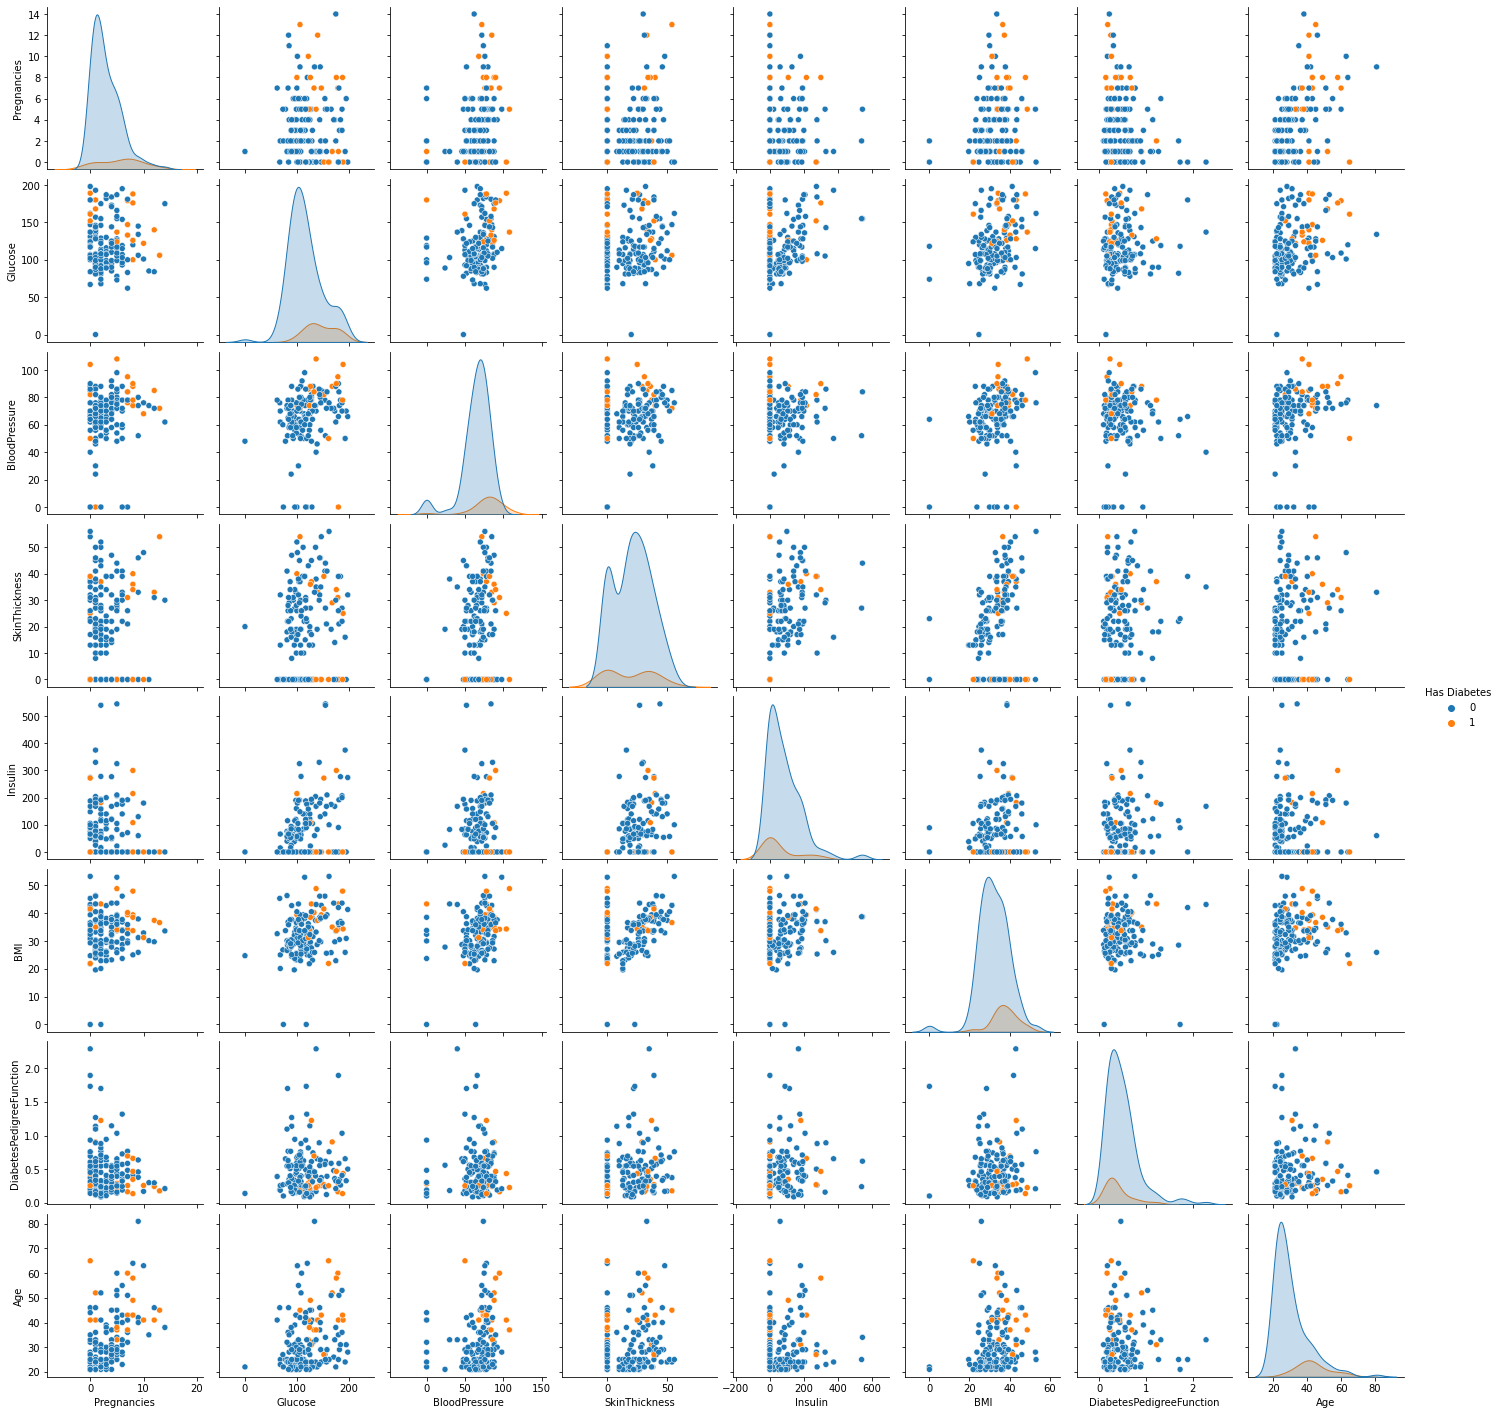

In [108]:
sns.pairplot(output_df, hue = 'Has Diabetes')

# **Accuracy Score**
Sklearn.metrics.accuracy_score. scikit. (n.d.). Retrieved November 13, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 

# **Categorical Naive Bayes**
1.9. naive Bayes. scikit. (n.d.). Retrieved November 13, 2022, from https://scikit-learn.org/stable/modules/naive_bayes.html 

# **Diabetes Data Set**
Chauhan, A. (2022, November 9). Predict diabetes. Kaggle. Retrieved November 13, 2022, from https://www.kaggle.com/datasets/89beb558127c7ead94e5f577cc2b5a80eeca56602f8d145afcba7ce2dccadf01?resource=download 

# **Diabetes Statistics in America**
CDC. (2022, January 24). The facts, stats, and impacts of diabetes. Centers for Disease Control and Prevention. Retrieved November 13, 2022, from https://www.cdc.gov/diabetes/library/spotlights/diabetes-facts-stats.html#:~:text=37.3%20million%20Americans%E2%80%94about%201,t%20know%20they%20have%20it. 

# **Seaborn**
Seaborn.pairplot. seaborn.pairplot - seaborn 0.12.1 documentation. (n.d.). Retrieved November 14, 2022, from https://seaborn.pydata.org/generated/seaborn.pairplot.html 